In [2]:
from google.colab import drive


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import torch
# from torch.nn import ReLU, Conv2d, Linear, Sequential, MaxPool2d, Module, Dropout 
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
import matplotlib.pyplot as plt
# from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve,auc

In [4]:
print("loading file")
import warnings
warnings.filterwarnings("ignore")
#to supress warnings

#make a function to unpickle
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
data_gray = unpickle('/content/drive/My Drive/ML/data5.pickle')

loading file


In [5]:
print(data_gray.keys())

dict_keys(['x_test', 'y_test', 'x_train', 'y_train', 'x_validation', 'y_validation', 'labels'])


In [6]:
print(data_gray.keys())
x_train = data_gray['x_train']
y_train = data_gray['y_train']

x_test = np.array(data_gray['x_test'])
y_test = np.array(data_gray['y_test'])

x_val = np.array(data_gray['x_validation'])
y_val = np.array(data_gray['y_validation'])

# X = np.array(x_train) 
# Y = np.array(y_train)
# #filtered X and Y
# filx = []
# fily = [] 
# # print(X.shape,"shape")
# # print(len(X), "len")
# c = np.zeros(43)

# # # ls = [0,14,18,23,33]
# size = 1500

# for i in range(len(X)):
#   #get the corresponding class y = 0, 14, 18, 23, 33
#   jk = y_train[i]
#   if(c[jk]<size):
#     filx.append(X[i])
#     fily.append(Y[i])
#     c[jk]+=1
# print(np.array(filx).shape, "fil shape")
# print(x_test.shape)


# fil = np.array(filx).reshape(64500,1024)
# fily = np.array(fily)
# print(filx.shape)
# print(fily.shape)
# x_test = np.array(x_test).reshape(12630,1024)
# y_test = np.array(y_test)
# img = filx[0]
# plt.imshow(img[0])
# plt.show()

dict_keys(['x_test', 'y_test', 'x_train', 'y_train', 'x_validation', 'y_validation', 'labels'])


In [7]:
trn_sample = np.array(x_train).reshape(len(x_train),1024)
trn_label = np.array(y_train)
print(trn_sample.shape)
print(trn_label.shape)
ts_sample = np.array(x_test).reshape(len(x_test),1024)
ts_label = np.array(y_test)

vl_sample = np.array(x_val).reshape(len(x_val),1024)
vl_label = np.array(y_val)

(86989, 1024)
(86989,)


In [8]:
train_x = np.array(x_train)
train_y = np.array(y_train)

# train_x, val_x, train_y, val_y = train_test_split(train_x,train_y,test_size=0.2)
(train_x.shape, train_y.shape)#, (val_x.shape, val_y.shape)

((86989, 1, 32, 32), (86989,))

In [9]:
train_x = torch.from_numpy(train_x)
train_y = torch.from_numpy(train_y)
train_x.shape, train_y.shape
val_x = torch.from_numpy(x_val)
val_y = torch.from_numpy(y_val)
val_x.shape, val_y.shape

test_x = torch.from_numpy(x_test)
test_y = torch.from_numpy(y_test)


train_data = []
for i in range(len(train_x)):
  train_data.append([train_x[i],train_y[i]])

trainloader = torch.utils.data.DataLoader(train_data,shuffle=True,batch_size = 64)

test_data = []
for i in range(len(x_test)):
  test_data.append([x_test[i],y_test[i]])

testloader = torch.utils.data.DataLoader(test_data,shuffle=True,batch_size = 64)


val_data = []
for i in range(len(x_val)):
  val_data.append([x_val[i],y_val[i]])

valloader = torch.utils.data.DataLoader(val_data,shuffle=True,batch_size = 64)

print(len(trainloader.dataset))
print(len(testloader.dataset))
print(len(valloader.dataset))
# i1, l1 = next(iter(trainloader))
# print(i1.shape)
# i2,l2 = next(iter(trainloader))
# print(i2.shape)

86989
12630
4410


In [0]:
dropout = 0.125
class CNN_Network(torch.nn.Module):

    def __init__(self):
        super(CNN_Network, self).__init__()

        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(16),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Dropout(p=dropout))
        # self.bn1 = torch.nn.BatchNorm2d(16)

        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(32),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Dropout(p=dropout))
        # self.bn2 = torch.nn.BatchNorm2d(32)

        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(64),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Dropout(p=dropout))
        # self.bn3 = torch.nn.BatchNorm2d(64)

        self.fc1 = torch.nn.Linear(4 * 4 * 64, 500, bias=True)
        torch.nn.init.xavier_uniform(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=dropout))
        
        # self.fc2 = torch.nn.Linear(256, 84, bias=True)
        # torch.nn.init.xavier_uniform(self.fc2.weight)
        # self.layer5 = torch.nn.Sequential(
        #     self.fc2,
        #     torch.nn.ReLU(),
        #     torch.nn.Dropout(p=dropout))

        self.fc2 = torch.nn.Linear(500, 43, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight) # initialize parameters

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.fc1(out)
        features = out
        out = self.fc2(out)
        # out = self.fc3(out)
        return out,features

#previously 16,32,64,500
# instantiate CNN model
model = CNN_Network()
# model

In [0]:
for param in model.parameters():
    print(param.size())

torch.Size([16, 1, 3, 3])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([32, 16, 3, 3])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([64, 32, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([500, 1024])
torch.Size([500])
torch.Size([43, 500])
torch.Size([43])


In [0]:
learning_rate = 0.0005
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()

print(model)


# train_x = torch.from_numpy(train_x)
# # train_y = train_y.astype(int)
# train_y = torch.from_numpy(train_y)

CNN_Network(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.125, inplace=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.125, inplace=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.125, inplace=

In [0]:
epochs = 250
losses = []
losses_val = []
loss_epoch = []
loss_epoch_val = []
accr_train = []
accr_val = []

for epoch in range(epochs):
  loss_val = 0
  # print(len(trainloader.dataset))
  for i,(x,y) in enumerate(trainloader):
    x = Variable(x.float())
    y = Variable(y)
    # print(i)
    # print(x.shape)
    # print(y.shape)
    if torch.cuda.is_available():
      x = x.cuda()
      y = y.cuda()

    optimizer.zero_grad()
    output_train,_ = model(x)
    loss_train = criterion(output_train,y)
    loss_val+=loss_train.data
    loss_train.backward()
    optimizer.step()
    losses.append(loss_train.data)

  print('Epoch: %d, loss: %.4f' %(epoch,loss_val))
  loss_epoch.append(loss_val)
  with torch.no_grad():
      output,_ = model(train_x.cuda())   
  softmax = torch.exp(output).cpu()
  prob = list(softmax.numpy())
  predictions = np.argmax(prob, axis=1)

  print("accuracy for testing",end = ' ')
  accr_train.append(accuracy_score(np.array(train_y), predictions))
  print(accuracy_score(np.array(train_y), predictions))
  print("##############################################")
  loss_val2 = 0
  for i,(x,y) in enumerate(valloader):
    x = Variable(x.float())
    y = Variable(y.long())
    # print(i)
    # print(x.shape)
    # print(y.shape)
    if torch.cuda.is_available():
      x = x.cuda()
      y = y.cuda()

    # optimizer.zero_grad()
    output_val,_ = model(x)
    loss_valid = criterion(output_val,y)
    loss_val2+=loss_valid.data
    # loss_valid.backward()
    # optimizer.step()
    losses_val.append(loss_valid.data)

  print('Epoch: %d, loss: %.4f' %(epoch,loss_val2))
  loss_epoch_val.append(loss_val2)
  with torch.no_grad():
      output,_ = model(val_x.cuda())   
  softmax = torch.exp(output).cpu()
  prob = list(softmax.numpy())
  predictions = np.argmax(prob, axis=1)

  print("accuracy for validation",end = ' ')
  accr_val.append(accuracy_score(np.array(val_y), predictions))
  print(accuracy_score(np.array(val_y), predictions))
  print("##############################################")





Epoch: 0, loss: 1113.2673
accuracy for testing 0.9465679568681098
##############################################
Epoch: 0, loss: 35.7518
accuracy for validation 0.8854875283446711
##############################################
Epoch: 1, loss: 206.4607
accuracy for testing 0.9702146248376231
##############################################
Epoch: 1, loss: 32.2712
accuracy for validation 0.9156462585034013
##############################################
Epoch: 2, loss: 136.9109
accuracy for testing 0.9758015381255101
##############################################
Epoch: 2, loss: 27.5382
accuracy for validation 0.9244897959183673
##############################################
Epoch: 3, loss: 112.5893
accuracy for testing 0.9802848636034441
##############################################
Epoch: 3, loss: 24.9178
accuracy for validation 0.9371882086167801
##############################################
Epoch: 4, loss: 88.7804
accuracy for testing 0.9819402453183735
###############################

In [0]:
model = unpickle('/content/drive/My Drive/ML/CNN_model_250')

In [0]:
filename = "CNN_model"
pickle.dump(model,open(filename,'wb'))

# print(loss_epoch)
loss_per_epoch = []
# print(loss_epoch[0])
for i in range(len(loss_epoch)):
  loss_per_epoch.append(float(loss_epoch[i]))
# print(len(loss_per_epoch))
plt.plot(loss_per_epoch)
plt.ylabel("loss_per_epoch")
plt.xlabel("epoch")
plt.title("loss_train vs epoch")
plt.show()

loss_per_epoch_val = []
# print(loss_epoch[0])
for i in range(len(loss_epoch_val)):
  loss_per_epoch_val.append(float(loss_epoch_val[i]))
# print(len(loss_per_epoch_val))
plt.plot(loss_per_epoch_val)
plt.ylabel("loss_per_epoch_val")
plt.xlabel("epoch")
plt.title("loss_val vs epoch")
plt.show()

plt.plot(accr_train)
plt.ylabel("accuracy per epoch training")
plt.xlabel("epoch")
plt.show()

plt.plot(accr_val)
plt.ylabel("accuracy per epoch validationo")
plt.xlabel("epoch")
plt.show()

NameError: ignored

In [0]:


with torch.no_grad():
    output,_ = model(train_x.cuda())
    
softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
# prob = np.array(prob,axis=1)
# print(softmax)
# print("prob_______________________________________00")
# print(prob.shape)
predictions1 = np.argmax(prob, axis=1)
print(predictions1)
# for i in range(len(prob)):
#   print(predictions[i],end=" ")
#   print(train_y[i])
#   print()

print("-------------------------------")
print((train_y))

# accuracy on training set
print(accuracy_score(np.array(train_y), predictions1))


print("for training dataset")
print("##############################################")
with torch.no_grad():
    output,_ = model(val_x.cuda())   
softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions2 = np.argmax(prob, axis=1)
print(predictions2)
# for i in range(len(prob)):
#   print(predictions[i],end=" ")
#   print(train_y[i])
#   print()

print("-------------------------------")
print((val_y))

# accuracy on training set
print(accuracy_score(np.array(val_y), predictions2))
print("for validation dataset  ")
print("##############################################")
with torch.no_grad():
    output,_ = model(test_x.cuda())   
softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)
print(predictions)
# for i in range(len(prob)):
#   print(predictions[i],end=" ")
#   print(train_y[i])
#   print()

print("-------------------------------")
print((test_y))

# accuracy on training set
print(accuracy_score(np.array(test_y), predictions))
print("for testing dataset  ")

[37 27 38 ... 11 14 30]
-------------------------------
tensor([37, 27, 38,  ..., 11, 14, 30])
0.9990228649599374
for training dataset
##############################################
[ 9 37 31 ...  5 18  6]
-------------------------------
tensor([ 9, 37, 31,  ...,  5, 18,  6], dtype=torch.uint8)
0.9734693877551021
for validation dataset  
##############################################
[25 11 38 ...  8 33 10]
-------------------------------
tensor([25, 11, 38,  ...,  8, 33, 10], dtype=torch.uint8)
0.9581947743467933
for testing dataset  


In [0]:
# # #ROC and various confusion metrics for CNN
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# y_score = model.decision_function(x_test)
# y_tester = np.zeros(np.array(test_y).size)
# for i in range(43):
#   for j in range(len(test_y)):
#     if(test_y[j]==i):
#       y_tester[j] = 1
#     else:
#       y_tester[j] = 0
#   fpr[i],tpr[i],thresh = roc_curve(test_y,y_score[:,i])
#   roc_auc[i] = auc(fpr[i],tpr[i])
# for i in range(43):
#   plt.plot(fpr[i],tpr[i],label = ("ROC_class :"+str(i)))
# plt.plot([0,1],[0,1],'k--')
# plt.ylabel('True positive rate')
# plt.xlabel('False positive rate')
# plt.title('ROC curve for CNN model')
# plt.show()

# predict probabilities for test set


# accuracy: (tp + tn) / (p + n)
print("for CNN model")
accuracy = accuracy_score(y_train, predictions1)
print("Accuracy on Train: ",end = '')
print(accuracy)

accuracy = accuracy_score(y_val, predictions2)
print("Accuracy on val: ",end = '')
print(accuracy)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy on Test: ",end = '')
print(accuracy)

precision = precision_score(y_test, predictions,  average='macro')
print("Precision: ",end = '')
print(precision)

recall = recall_score(y_test,predictions,average = 'macro')
print("recall_score: ",end = '')
print(recall)

for CNN model
Accuracy on Train: 0.9990228649599374
Accuracy on val: 0.9734693877551021
Accuracy on Test: 0.9581947743467933
Precision: 0.9404177423434467
recall_score: 0.9339392413843881


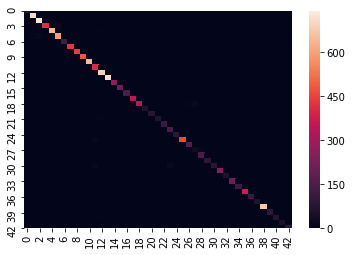

In [0]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(matrix,annot=False,cbar=True)
# sns

In [0]:
train_sample = np.zeros((1,500))
train_label = np.array([])

for images,labels in trainloader:
  images = Variable(images.float())
  labels = Variable(labels)
  if torch.cuda.is_available():
      images = images.cuda()
  tes = np.array(labels.tolist())

  _,features = model(images)
  features = np.array(features.tolist())
  train_sample = np.vstack([train_sample,features])
  train_label = np.append(train_label,tes)

train_sample = np.array(train_sample[1:])
print(train_sample.shape)
print(train_label.shape)


(86989, 500)
(86989,)


In [0]:
val_sample = np.zeros((1,500))
val_label = np.array([])

for images,labels in valloader:
  images = Variable(images.float())
  labels = Variable(labels)
  if torch.cuda.is_available():
      images = images.cuda()
  tes = np.array(labels.tolist())

  _,features = model(images)
  features = np.array(features.tolist())
  val_sample = np.vstack([val_sample,features])
  val_label = np.append(val_label,tes)

val_sample = np.array(val_sample[1:])
print(val_sample.shape)
print(val_label.shape)

(4410, 500)
(4410,)


In [0]:
test_sample = np.zeros((1,500))
test_label = np.array([])

for images,labels in testloader:
  images = Variable(images.float())
  labels = Variable(labels)
  if torch.cuda.is_available():
      images = images.cuda()
  tes = np.array(labels.tolist())

  _,features = model(images)
  features = np.array(features.tolist())
  test_sample = np.vstack([test_sample,features])
  test_label = np.append(test_label,tes)

test_sample = np.array(test_sample[1:])
print(test_sample.shape)
print(test_label.shape)

(12630, 500)
(12630,)


In [0]:
#Implementing Logistic With Extracted Features from CNN
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic_model = LogisticRegression(solver='lbfgs')
logistic_model.fit(train_sample,train_label)
y_pred_logistic = logistic_model.predict(test_sample)


In [0]:
logistic_model = unpickle('/content/drive/My Drive/ML/Logistic_model')

for Logistic model
Accuracy on Train: 0.9993677361505477
Accuracy on val: 0.9680272108843537
Accuracy on test: 0.9536025336500396
Precision: 0.9274220472358919
recall_score: 0.9246303178153531



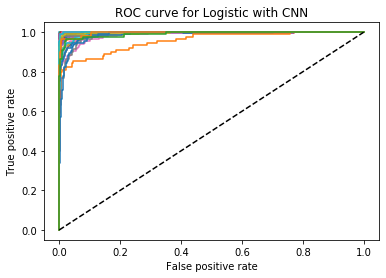

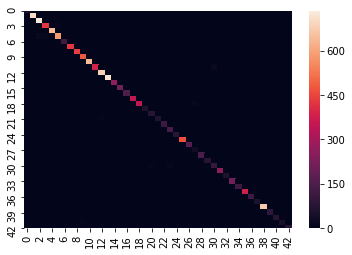

In [0]:
print("for Logistic model")
# y_pred_logistic = logistic_model.predict(test_sample)

train_logis_pred = logistic_model.predict(train_sample)
accuracy = accuracy_score(train_label, train_logis_pred)
print("Accuracy on Train: ",end = '')
print(accuracy)

val_logis_pred = logistic_model.predict(val_sample)
accuracy = accuracy_score(val_label, val_logis_pred)
print("Accuracy on val: ",end = '')
print(accuracy)

test_logis_pred = logistic_model.predict(test_sample)
accuracy = accuracy_score(test_label, test_logis_pred)
print("Accuracy on test: ",end = '')
print(accuracy)

precision = precision_score(test_label, test_logis_pred,  average='macro')
print("Precision: ",end = '')
print(precision)

recall = recall_score(test_label, test_logis_pred,average = 'macro')
print("recall_score: ",end = '')
print(recall)
print()

#ROC and various confusion metrics for CNN
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = logistic_model.decision_function(test_sample)
y_tester = np.zeros(np.array(test_label).size)
for i in range(43):
  for j in range(len(test_label)):
    if(test_label[j]==i):
      y_tester[j] = 1
    else:
      y_tester[j] = 0
  fpr[i],tpr[i],thresh = roc_curve(y_tester,y_score[:,i])
  roc_auc[i] = auc(fpr[i],tpr[i])
for i in range(43):
  plt.plot(fpr[i],tpr[i],label = ("ROC_class :"+str(i)))
plt.plot([0,1],[0,1],'k--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC curve for Logistic with CNN')
plt.show()

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_label,test_logis_pred )

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(matrix,annot=False,cbar=True)

In [0]:
filename_logistic = "Logistic_model"
pickle.dump(logistic_model,open(filename_logistic,'wb'))

In [0]:
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score
svm_rbf_model = svm.SVC(kernel = 'rbf',gamma = 'scale', decision_function_shape = 'ovr')
svm_rbf_model.fit(train_sample,train_label) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
svm_rbf_model = unpickle('/content/drive/My Drive/ML/svm_rbf_model')

Accuracy on test: 0.9636579572446555
Precision: 0.9444968405190746
recall_score: 0.9432443849825042



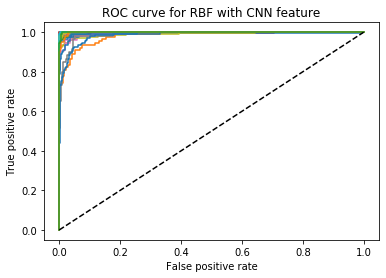

In [0]:
# print("for SVM RBF model")
# train_rbf_pred = svm_rbf_model.predict(train_sample)
# accuracy = accuracy_score(train_label, train_rbf_pred)
# print("Accuracy on Train: ",end = '')
# print(accuracy)

# val_rbf_pred = svm_rbf_model.predict(val_sample)
# accuracy = accuracy_score(val_label, val_rbf_pred)
# print("Accuracy on val: ",end = '')
# print(accuracy)

test_rbf_pred = svm_rbf_model.predict(test_sample)
accuracy = accuracy_score(test_label, test_rbf_pred)
print("Accuracy on test: ",end = '')
print(accuracy)

precision = precision_score(test_label, test_rbf_pred,  average='macro')
print("Precision: ",end = '')
print(precision)

recall = recall_score(test_label, test_rbf_pred,average = 'macro')
print("recall_score: ",end = '')
print(recall)
print()

#ROC and various confusion metrics for CNN
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = svm_rbf_model.decision_function(test_sample)
y_tester = np.zeros(np.array(test_label).size)
for i in range(43):
  for j in range(len(test_label)):
    if(test_label[j]==i):
      y_tester[j] = 1
    else:
      y_tester[j] = 0
  fpr[i],tpr[i],thresh = roc_curve(y_tester,y_score[:,i])
  roc_auc[i] = auc(fpr[i],tpr[i])
for i in range(43):
  plt.plot(fpr[i],tpr[i],label = ("ROC_class :"+str(i)))
plt.plot([0,1],[0,1],'k--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC curve for RBF with CNN feature')
plt.show()



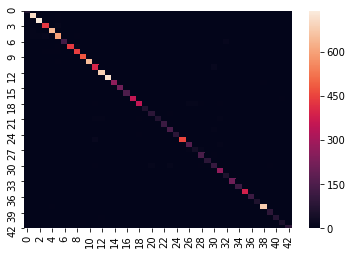

In [0]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_label,test_rbf_pred )

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(matrix,annot=False,cbar=True)

In [0]:
filename_svm_rbf = "svm_rbf_model"
pickle.dump(svm_rbf_model,open(filename_svm_rbf,'wb'))

In [0]:
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score
svm_poly_model = svm.SVC(kernel = 'poly',degree = 3, decision_function_shape = 'ovr')
svm_poly_model.fit(train_sample,train_label) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
svm_poly_model = unpickle('/content/drive/My Drive/ML/svm_poly_model')

for SVM POLY model
Accuracy on test: 0.9527315914489312
Precision: 0.9174033874231167
recall_score: 0.9306988455315046



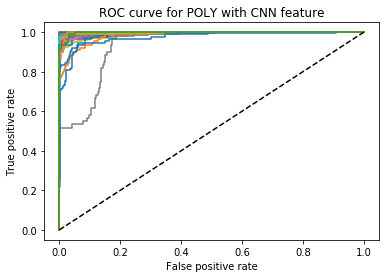

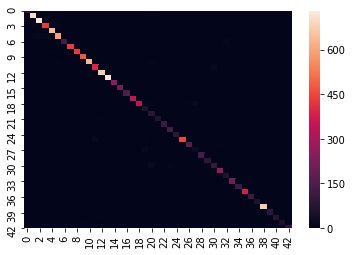

In [0]:
print("for SVM POLY model")
# train_poly_pred = svm_poly_model.predict(train_sample)
# accuracy = accuracy_score(train_label, train_poly_pred)
# print("Accuracy on Train: ",end = '')
# print(accuracy)

# val_poly_pred = svm_poly_model.predict(val_sample)
# accuracy = accuracy_score(val_label, val_poly_pred)
# print("Accuracy on val: ",end = '')
# print(accuracy)

test_poly_pred = svm_poly_model.predict(test_sample)
accuracy = accuracy_score(test_label, test_poly_pred)
print("Accuracy on test: ",end = '')
print(accuracy)

precision = precision_score(test_label, test_poly_pred,  average='macro')
print("Precision: ",end = '')
print(precision)

recall = recall_score(test_label, test_poly_pred,average = 'macro')
print("recall_score: ",end = '')
print(recall)
print()

#ROC and various confusion metrics for CNN
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = svm_poly_model.decision_function(test_sample)
y_tester = np.zeros(np.array(test_label).size)
for i in range(43):
  for j in range(len(test_label)):
    if(test_label[j]==i):
      y_tester[j] = 1
    else:
      y_tester[j] = 0
  fpr[i],tpr[i],thresh = roc_curve(y_tester,y_score[:,i])
  roc_auc[i] = auc(fpr[i],tpr[i])
for i in range(43):
  plt.plot(fpr[i],tpr[i],label = ("ROC_class :"+str(i)))
plt.plot([0,1],[0,1],'k--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC curve for POLY with CNN feature')
plt.show()
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_label,test_poly_pred )

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(matrix,annot=False,cbar=True)

In [0]:
filename_poly_rbf = "svm_poly_model"
pickle.dump(svm_poly_model,open(filename_poly_rbf,'wb'))

In [0]:
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score
svm_linear_model = svm.SVC(kernel = 'linear',decision_function_shape = 'ovr')
svm_linear_model.fit(train_sample,train_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
svm_linear_model = unpickle('/content/drive/My Drive/ML/svm_linear_model')

for SVM LINEAR model
Accuracy on test: 0.9570071258907363
Precision: 0.9372982925128291
recall_score: 0.9350942360264908



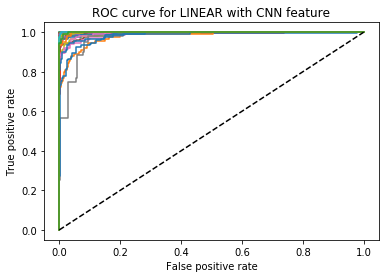

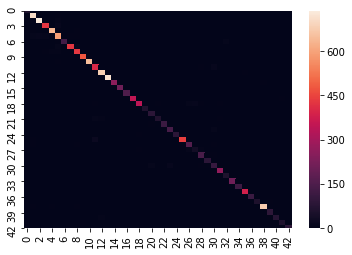

In [0]:
print("for SVM LINEAR model")
# train_linear_pred = svm_linear_model.predict(train_sample)
# accuracy = accuracy_score(train_label, train_linear_pred)
# print("Accuracy on Train: ",end = '')
# print(accuracy)

# val_linear_pred = svm_linear_model.predict(val_sample)
# accuracy = accuracy_score(val_label, val_linear_pred)
# print("Accuracy on val: ",end = '')
# print(accuracy)

test_linear_pred = svm_linear_model.predict(test_sample)
accuracy = accuracy_score(test_label, test_linear_pred)
print("Accuracy on test: ",end = '')
print(accuracy)

precision = precision_score(test_label, test_linear_pred,  average='macro')
print("Precision: ",end = '')
print(precision)

recall = recall_score(test_label, test_linear_pred,average = 'macro')
print("recall_score: ",end = '')
print(recall)
print()

#ROC and various confusion metrics for CNN
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = svm_linear_model.decision_function(test_sample)
y_tester = np.zeros(np.array(test_label).size)
for i in range(43):
  for j in range(len(test_label)):
    if(test_label[j]==i):
      y_tester[j] = 1
    else:
      y_tester[j] = 0
  fpr[i],tpr[i],thresh = roc_curve(y_tester,y_score[:,i])
  roc_auc[i] = auc(fpr[i],tpr[i])
for i in range(43):
  plt.plot(fpr[i],tpr[i],label = ("ROC_class :"+str(i)))
plt.plot([0,1],[0,1],'k--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC curve for LINEAR with CNN feature')
plt.show()
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_label,test_linear_pred )

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(matrix,annot=False,cbar=True)

In [0]:
filename_linear_rbf = "svm_linear_model"
pickle.dump(svm_linear_model,open(filename_linear_rbf,'wb'))

In [0]:
model_relu = MLPClassifier(hidden_layer_sizes=(256,128,64),activation='relu',batch_size = 64,max_iter=300,learning_rate_init=0.00145,verbose = True)
model_relu.fit(train_sample,train_label)

Iteration 1, loss = 0.07310465
Iteration 2, loss = 0.02615069
Iteration 3, loss = 0.02312100
Iteration 4, loss = 0.01864575
Iteration 5, loss = 0.01904591
Iteration 6, loss = 0.01868575
Iteration 7, loss = 0.01268115
Iteration 8, loss = 0.02409737
Iteration 9, loss = 0.02126039
Iteration 10, loss = 0.01283643
Iteration 11, loss = 0.01014207
Iteration 12, loss = 0.02000343
Iteration 13, loss = 0.01357051
Iteration 14, loss = 0.01672337
Iteration 15, loss = 0.01814058
Iteration 16, loss = 0.01783310
Iteration 17, loss = 0.01310483
Iteration 18, loss = 0.01941902
Iteration 19, loss = 0.01645749
Iteration 20, loss = 0.01599431
Iteration 21, loss = 0.02403459
Iteration 22, loss = 0.02138930
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size=64, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(256, 128, 64), learning_rate='constant',
              learning_rate_init=0.00145, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [0]:
model_relu = unpickle('/content/drive/My Drive/ML/model_relu')

for MLP model
Accuracy on test: 0.9490102929532859
Precision: 0.9224259345019091
recall_score: 0.9241672007915687



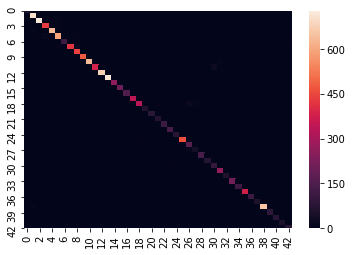

In [0]:
print("for MLP model")
# train_MLP_pred = model_relu.predict(train_sample)
# accuracy = accuracy_score(train_label, train_MLP_pred)
# print("Accuracy on Train: ",end = '')
# print(accuracy)

# val_MLP_pred = model_relu.predict(val_sample)
# accuracy = accuracy_score(val_label, val_MLP_pred)
# print("Accuracy on val: ",end = '')
# print(accuracy)

test_MLP_pred = model_relu.predict(test_sample)
accuracy = accuracy_score(test_label, test_MLP_pred)
print("Accuracy on test: ",end = '')
print(accuracy)

precision = precision_score(test_label, test_MLP_pred,  average='macro')
print("Precision: ",end = '')
print(precision)

recall = recall_score(test_label, test_MLP_pred,average = 'macro')
print("recall_score: ",end = '')
print(recall)
print()

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_label,test_MLP_pred )

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(matrix,annot=False,cbar=True)

# #ROC and various confusion metrics for CNN
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# y_score = model_relu.decision_function(test_sample)
# y_tester = np.zeros(np.array(test_label).size)
# for i in range(43):
#   for j in range(len(test_label)):
#     if(test_label[j]==i):
#       y_tester[j] = 1
#     else:
#       y_tester[j] = 0
#   fpr[i],tpr[i],thresh = roc_curve(y_tester,y_score[:,i])
#   roc_auc[i] = auc(fpr[i],tpr[i])
# for i in range(43):
#   plt.plot(fpr[i],tpr[i],label = ("ROC_class :"+str(i)))
# plt.plot([0,1],[0,1],'k--')
# plt.ylabel('True positive rate')
# plt.xlabel('False positive rate')
# plt.title('ROC curve for MLP with RELU with CNN feature')
# plt.show()

In [0]:
filename_MLP_relu = "model_relu"
pickle.dump(model_relu,open(filename_MLP_relu,'wb'))

In [0]:
from sklearn.ensemble import RandomForestClassifier

random_fr_model = RandomForestClassifier(n_estimators=100, max_depth=50,max_features = 'sqrt')
random_fr_model.fit(train_sample,train_label)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

for RFR model
Accuracy on Train: 1.0
Accuracy on val: 0.9727891156462585
Accuracy on test: 0.9602533650039589
Precision: 0.9330518578764496
recall_score: 0.9410583916888264



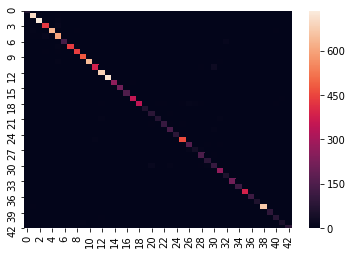

In [0]:
print("for RFR model")
train_rfr_pred = random_fr_model.predict(train_sample)
accuracy = accuracy_score(train_label, train_rfr_pred)
print("Accuracy on Train: ",end = '')
print(accuracy)

val_rfr_pred = random_fr_model.predict(val_sample)
accuracy = accuracy_score(val_label, val_rfr_pred)
print("Accuracy on val: ",end = '')
print(accuracy)

test_rfr_pred = random_fr_model.predict(test_sample)
accuracy = accuracy_score(test_label, test_rfr_pred)
print("Accuracy on test: ",end = '')
print(accuracy)

precision = precision_score(test_label, test_rfr_pred,  average='macro')
print("Precision: ",end = '')
print(precision)

recall = recall_score(test_label, test_rfr_pred,average = 'macro')
print("recall_score: ",end = '')
print(recall)
print()

#ROC and various confusion metrics for CNN
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# y_score = random_fr_model.decision_function(test_sample)
# y_tester = np.zeros(np.array(test_label).size)
# for i in range(43):
#   for j in range(len(test_label)):
#     if(test_label[j]==i):
#       y_tester[j] = 1
#     else:
#       y_tester[j] = 0
#   fpr[i],tpr[i],thresh = roc_curve(y_tester,y_score[:,i])
#   roc_auc[i] = auc(fpr[i],tpr[i])
# for i in range(43):
#   plt.plot(fpr[i],tpr[i],label = ("ROC_class :"+str(i)))
# plt.plot([0,1],[0,1],'k--')
# plt.ylabel('True positive rate')
# plt.xlabel('False positive rate')
# plt.title('ROC curve for Random fr with CNN feature')
# plt.show()

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_label,test_rfr_pred )

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(matrix,annot=False,cbar=True)

In [0]:
filename_random_fr = 'Random_forest_Classifier'
pickle.dump(random_fr_model,open(filename_random_fr,'wb'))


In [8]:
model_relu = MLPClassifier(hidden_layer_sizes=(256,128,64),activation='relu',batch_size = 128,max_iter=75,learning_rate_init=0.0001,verbose = True)
model_relu.fit(trn_sample,trn_label)

Iteration 1, loss = 6.71754086
Iteration 2, loss = 3.75109265
Iteration 3, loss = 3.60147998
Iteration 4, loss = 3.32689789
Iteration 5, loss = 2.99559524
Iteration 6, loss = 2.67026725
Iteration 7, loss = 2.35389027
Iteration 8, loss = 2.11785911
Iteration 9, loss = 1.84947670
Iteration 10, loss = 1.38855551
Iteration 11, loss = 1.06727763
Iteration 12, loss = 0.89321043
Iteration 13, loss = 0.75548571
Iteration 14, loss = 0.65302370
Iteration 15, loss = 0.57330632
Iteration 16, loss = 0.51289557
Iteration 17, loss = 0.46326897
Iteration 18, loss = 0.42650349
Iteration 19, loss = 0.39043150
Iteration 20, loss = 0.36005094
Iteration 21, loss = 0.33758312
Iteration 22, loss = 0.31124201
Iteration 23, loss = 0.29472414
Iteration 24, loss = 0.27529968
Iteration 25, loss = 0.26345940
Iteration 26, loss = 0.24410375
Iteration 27, loss = 0.22955936
Iteration 28, loss = 0.21761121
Iteration 29, loss = 0.20799159
Iteration 30, loss = 0.19728998
Iteration 31, loss = 0.18531572
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size=128, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(256, 128, 64), learning_rate='constant',
              learning_rate_init=0.0001, max_iter=75, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

for MLP model with raw data
Accuracy on Train: 0.990355102369265
Accuracy on val: 0.8532879818594105
Accuracy on test: 0.8568487727632621
Precision: 0.8186721492863823
recall_score: 0.8202460822422907



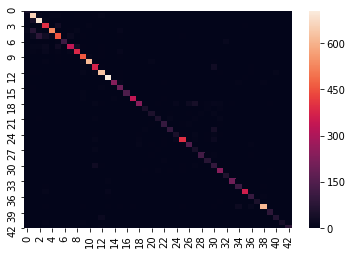

In [9]:
print("for MLP model with raw data")
train_MLP_pred = model_relu.predict(trn_sample)
accuracy = accuracy_score(trn_label, train_MLP_pred)
print("Accuracy on Train: ",end = '')
print(accuracy)

val_MLP_pred = model_relu.predict(vl_sample)
accuracy = accuracy_score(vl_label, val_MLP_pred)
print("Accuracy on val: ",end = '')
print(accuracy)

test_MLP_pred = model_relu.predict(ts_sample)
accuracy = accuracy_score(ts_label, test_MLP_pred)
print("Accuracy on test: ",end = '')
print(accuracy)

precision = precision_score(ts_label, test_MLP_pred,  average='macro')
print("Precision: ",end = '')
print(precision)

recall = recall_score(ts_label, test_MLP_pred,average = 'macro')
print("recall_score: ",end = '')
print(recall)
print()

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(ts_label,test_MLP_pred )

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(matrix,annot=False,cbar=True)

# #ROC and various confusion metrics for CNN
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# y_score = model_relu.decision_function(test_sample)
# y_tester = np.zeros(np.array(test_label).size)
# for i in range(43):
#   for j in range(len(test_label)):
#     if(test_label[j]==i):
#       y_tester[j] = 1
#     else:
#       y_tester[j] = 0
#   fpr[i],tpr[i],thresh = roc_curve(y_tester,y_score[:,i])
#   roc_auc[i] = auc(fpr[i],tpr[i])
# for i in range(43):
#   plt.plot(fpr[i],tpr[i],label = ("ROC_class :"+str(i)))
# plt.plot([0,1],[0,1],'k--')
# plt.ylabel('True positive rate')
# plt.xlabel('False positive rate')
# plt.title('ROC curve for MLP with RELU with CNN feature')
# plt.show()

In [10]:
#Implementing Logistic With Extracted Features from CNN
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic_model = LogisticRegression(solver='lbfgs')
logistic_model.fit(trn_sample,trn_label)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

for Logistic model
Accuracy on Train: 0.9302325581395349
Accuracy on val: 0.8154195011337868
Accuracy on test: 0.7977830562153603
Precision: 0.7366841936914508
recall_score: 0.7221008245396516



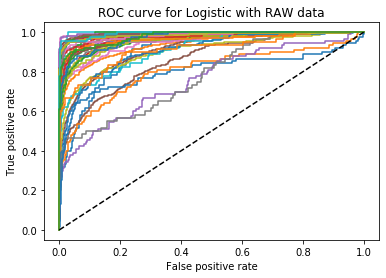

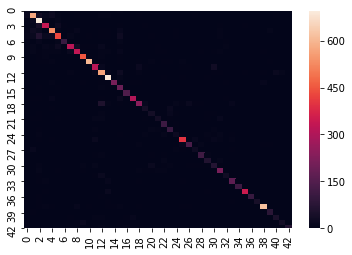

In [24]:
print("for Logistic model")
# y_pred_logistic = logistic_model.predict(test_sample)

train_logis_pred = logistic_model.predict(trn_sample)
accuracy = accuracy_score(trn_label, train_logis_pred)
print("Accuracy on Train: ",end = '')
print(accuracy)

val_logis_pred = logistic_model.predict(vl_sample)
accuracy = accuracy_score(vl_label, val_logis_pred)
print("Accuracy on val: ",end = '')
print(accuracy)

test_logis_pred = logistic_model.predict(ts_sample)
accuracy = accuracy_score(ts_label, test_logis_pred)
print("Accuracy on test: ",end = '')
print(accuracy)

precision = precision_score(ts_label, test_logis_pred,  average='macro')
print("Precision: ",end = '')
print(precision)

recall = recall_score(ts_label, test_logis_pred,average = 'macro')
print("recall_score: ",end = '')
print(recall)
print()

#ROC and various confusion metrics for CNN
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = logistic_model.decision_function(ts_sample)
y_tester = np.zeros(np.array(ts_label).size)
for i in range(43):
  for j in range(len(ts_label)):
    if(ts_label[j]==i):
      y_tester[j] = 1
    else:
      y_tester[j] = 0
  fpr[i],tpr[i],thresh = roc_curve(y_tester,y_score[:,i])
  roc_auc[i] = auc(fpr[i],tpr[i])
for i in range(43):
  plt.plot(fpr[i],tpr[i],label = ("ROC_class :"+str(i)))
plt.plot([0,1],[0,1],'k--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC curve for Logistic with RAW data')
plt.show()

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(ts_label,test_logis_pred )

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(matrix,annot=False,cbar=True)

In [10]:
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score
svm_linear_model = svm.SVC(kernel = 'linear',decision_function_shape = 'ovr')
svm_linear_model.fit(trn_sample,trn_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
train_linear_pred = svm_linear_model.predict(trn_sample)
accuracy = accuracy_score(trn_label, train_linear_pred)
print("Accuracy on Train: ",end = '')
print(accuracy)

val_linear_pred = svm_linear_model.predict(vl_sample)
accuracy = accuracy_score(vl_label, val_linear_pred)
print("Accuracy on val: ",end = '')
print(accuracy)

test_linear_pred = svm_linear_model.predict(ts_sample)
accuracy = accuracy_score(ts_label, test_linear_pred)
print("Accuracy on test: ",end = '')
print(accuracy)

precision = precision_score(ts_label, test_linear_pred,  average='macro')
print("Precision: ",end = '')
print(precision)

recall = recall_score(ts_label, test_linear_pred,average = 'macro')
print("recall_score: ",end = '')
print(recall)
print()

#ROC and various confusion metrics for CNN
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = svm_linear_model.decision_function(ts_sample)
y_tester = np.zeros(np.array(ts_label).size)
for i in range(43):
  for j in range(len(ts_label)):
    if(ts_label[j]==i):
      y_tester[j] = 1
    else:
      y_tester[j] = 0
  fpr[i],tpr[i],thresh = roc_curve(y_tester,y_score[:,i])
  roc_auc[i] = auc(fpr[i],tpr[i])
for i in range(43):
  plt.plot(fpr[i],tpr[i],label = ("ROC_class :"+str(i)))
plt.plot([0,1],[0,1],'k--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC curve for Svm Linear with RAW data')
plt.show()

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(ts_label,test_linear_pred )

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(matrix,annot=False,cbar=True)

In [0]:
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score
svm_poly_model = svm.SVC(kernel = 'poly',degree = 3,decision_function_shape = 'ovr')
svm_poly_model.fit(trn_sample,trn_label)

In [0]:
train_poly_pred = svm_poly_model.predict(trn_sample)
accuracy = accuracy_score(trn_label, train_poly_pred)
print("Accuracy on Train: ",end = '')
print(accuracy)

val_poly_pred = svm_poly_model.predict(vl_sample)
accuracy = accuracy_score(vl_label, val_poly_pred)
print("Accuracy on val: ",end = '')
print(accuracy)

test_poly_pred = svm_poly_model.predict(ts_sample)
accuracy = accuracy_score(ts_label, test_poly_pred)
print("Accuracy on test: ",end = '')
print(accuracy)

precision = precision_score(ts_label, test_poly_pred,  average='macro')
print("Precision: ",end = '')
print(precision)

recall = recall_score(ts_label, test_poly_pred,average = 'macro')
print("recall_score: ",end = '')
print(recall)
print()

#ROC and various confusion metrics for CNN
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = svm_poly_model.decision_function(ts_sample)
y_tester = np.zeros(np.array(ts_label).size)
for i in range(43):
  for j in range(len(ts_label)):
    if(ts_label[j]==i):
      y_tester[j] = 1
    else:
      y_tester[j] = 0
  fpr[i],tpr[i],thresh = roc_curve(y_tester,y_score[:,i])
  roc_auc[i] = auc(fpr[i],tpr[i])
for i in range(43):
  plt.plot(fpr[i],tpr[i],label = ("ROC_class :"+str(i)))
plt.plot([0,1],[0,1],'k--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC curve for SVM POLY with RAW data')
plt.show()

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(ts_label,test_poly_pred )

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(matrix,annot=False,cbar=True)

In [0]:
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score
svm_rbf_model = svm.SVC(kernel = 'rbf',gamma = 'scale', decision_function_shape = 'ovr')
svm_rbf_model.fit(trn_sample,trn_label) 

In [0]:
train_rbf_pred = svm_rbf_model.predict(trn_sample)
accuracy = accuracy_score(trn_label, train_rbf_pred)
print("Accuracy on Train: ",end = '')
print(accuracy)

val_rbf_pred = svm_rbf_model.predict(vl_sample)
accuracy = accuracy_score(vl_label, val_rbf_pred)
print("Accuracy on val: ",end = '')
print(accuracy)

test_rbf_pred = svm_rbf_model.predict(ts_sample)
accuracy = accuracy_score(ts_label, test_rbf_pred)
print("Accuracy on test: ",end = '')
print(accuracy)

precision = precision_score(ts_label, test_rbf_pred,  average='macro')
print("Precision: ",end = '')
print(precision)

recall = recall_score(ts_label, test_rbf_pred,average = 'macro')
print("recall_score: ",end = '')
print(recall)
print()

#ROC and various confusion metrics for CNN
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = svm_rbf_model.decision_function(ts_sample)
y_tester = np.zeros(np.array(ts_label).size)
for i in range(43):
  for j in range(len(ts_label)):
    if(ts_label[j]==i):
      y_tester[j] = 1
    else:
      y_tester[j] = 0
  fpr[i],tpr[i],thresh = roc_curve(y_tester,y_score[:,i])
  roc_auc[i] = auc(fpr[i],tpr[i])
for i in range(43):
  plt.plot(fpr[i],tpr[i],label = ("ROC_class :"+str(i)))
plt.plot([0,1],[0,1],'k--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC curve for SVM RBF with RAW data')
plt.show()

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(ts_label,test_rbf_pred )

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(matrix,annot=False,cbar=True)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(trn_sample,trn_label)
  pred = knn.predict(ts_sample)
  scores[k] = metrics.accuracy_score(ts_label,pred)
  scores_list.append(metrics.accuracy_score(ts_label,pred))
  print("testing accuracy")
  print(k)
  print(metrics.accuracy_score(ts_label,pred))